In [1]:
boston = read.csv('data/boston.csv')

In [2]:
str(boston)

'data.frame':	506 obs. of  16 variables:
 $ TOWN   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ TRACT  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ LON    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ LAT    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.

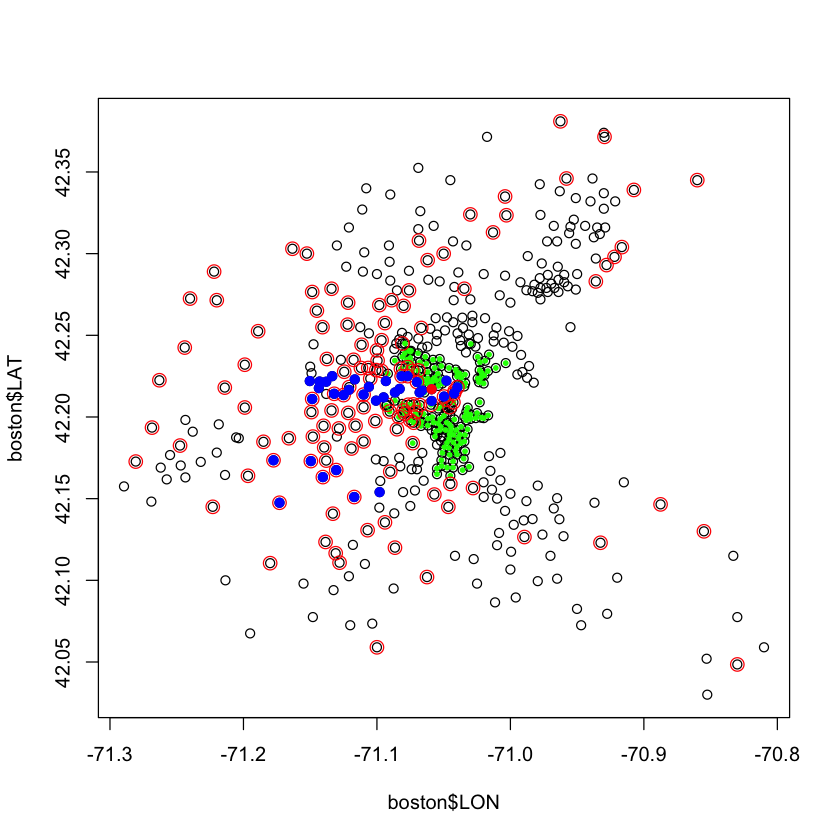

In [20]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$NOX>=0.6], boston$LAT[boston$NOX>=0.6],
      col='green', pch=19, cex=0.5)
points(boston$LON[boston$MEDV>=25], boston$LAT[boston$MEDV>=25],
      col='red', cex=1.5)
points(boston$LON[boston$CHAS==1], boston$LAT[boston$CHAS==1],
      col='blue', pch=19)
points(boston$LON[boston$TRACT==3531], boston$LAT[boston$TRACT==3531],
      col='red', pch=19)


In [8]:
summary(boston$NOX)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3850  0.4490  0.5380  0.5547  0.6240  0.8710 

In [12]:
summary(boston$MEDV)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

# Lat Lon linear model:

In [21]:
latlonlm = lm(MEDV ~ LAT + LON, data=boston)
summary(latlonlm)


Call:
lm(formula = MEDV ~ LAT + LON, data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.460  -5.590  -1.299   3.695  28.129 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3178.472    484.937  -6.554 1.39e-10 ***
LAT             8.046      6.327   1.272    0.204    
LON           -40.268      5.184  -7.768 4.50e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.693 on 503 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1036 
F-statistic: 30.19 on 2 and 503 DF,  p-value: 4.159e-13


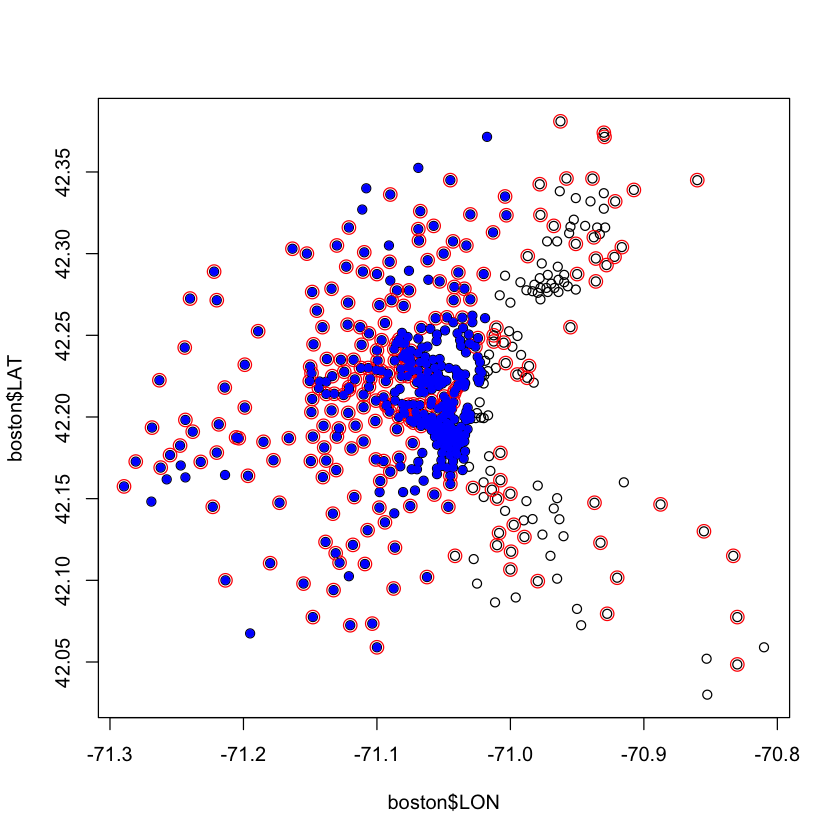

In [23]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2],
      col='red', cex=1.5)
points(boston$LON[latlonlm$fitted.values>=21.2],
       boston$LAT[latlonlm$fitted.values>=21.2],
      col='blue', pch=19, cex=0.8)

## Not so well with linear model

# Regression Tree Model

In [24]:
library(rpart)
library(rpart.plot)
latlontree = rpart(MEDV ~ LAT + LON, data=boston)

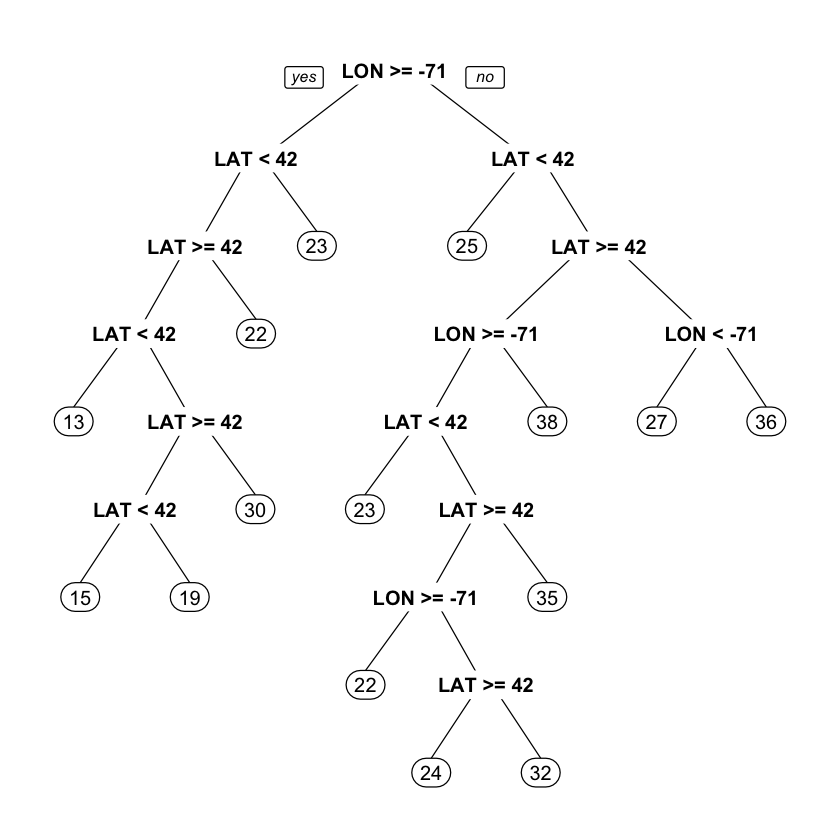

In [25]:
prp(latlontree)

In [26]:
fittedValuesTree = predict(latlontree)

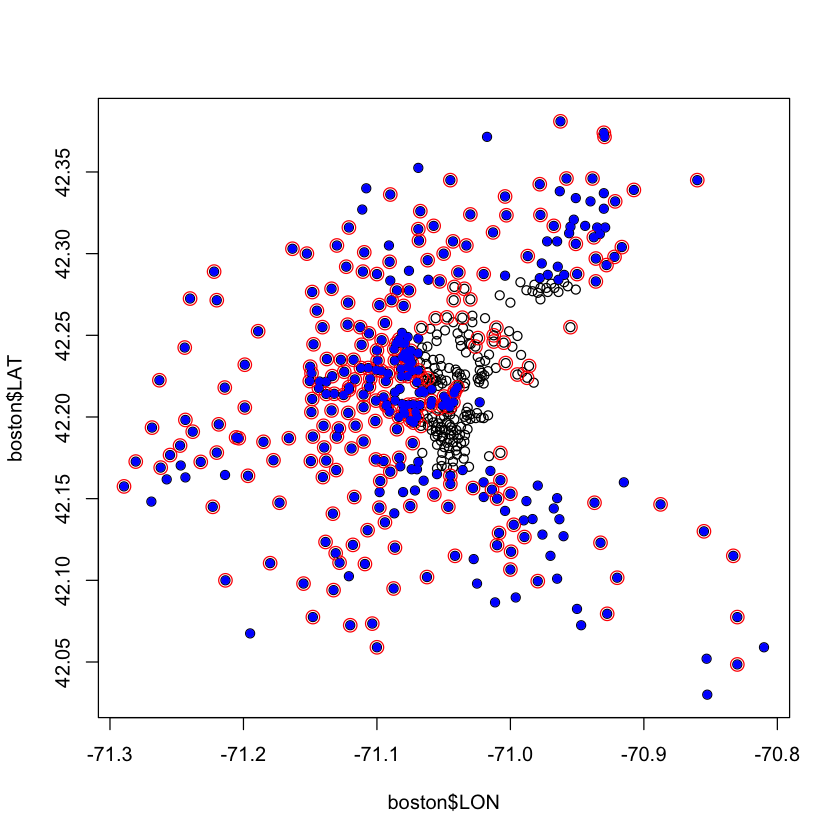

In [27]:
plot(boston$LON, boston$LAT)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2],
      col='red', cex=1.5)
points(boston$LON[fittedValuesTree>=21.2],
       boston$LAT[fittedValuesTree>=21.2],
      col='blue', pch=19, cex=0.8)

## Now try to make the tree simpler:

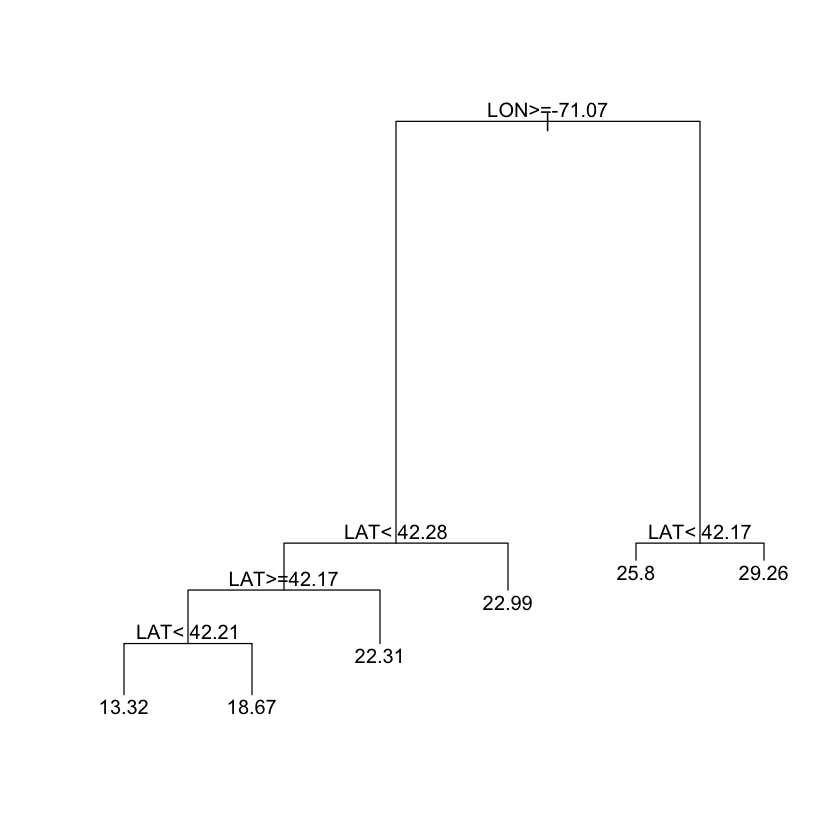

In [29]:
latlontree = rpart(MEDV ~ LAT + LON, data=boston,
                  minbucket=50)
plot(latlontree)
text(latlontree)

In [30]:
fittedValuesTree = predict(latlontree)

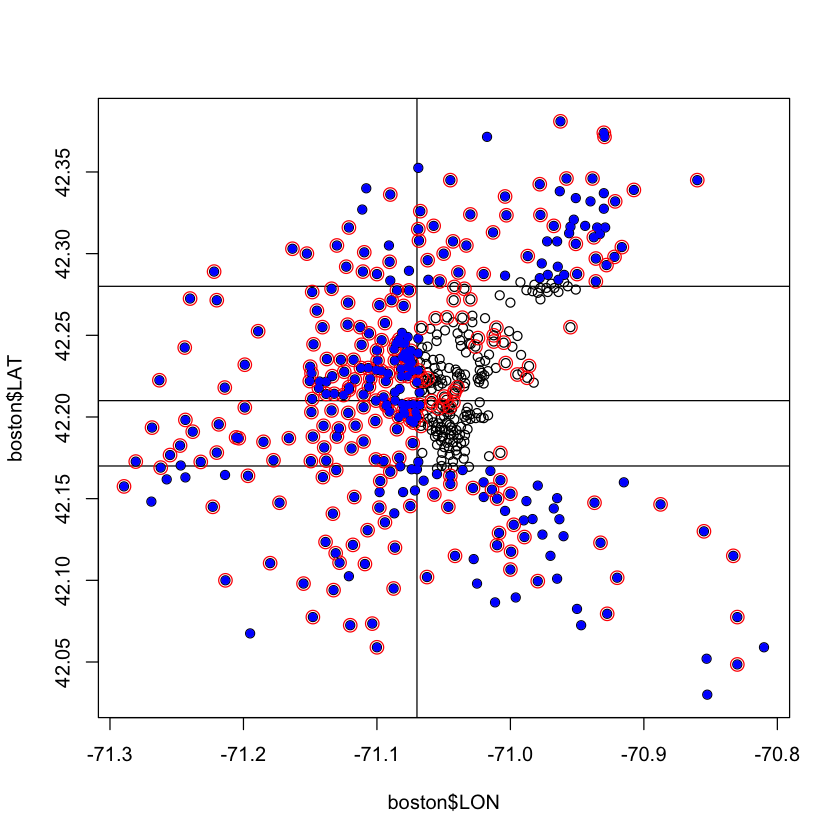

In [36]:
plot(boston$LON, boston$LAT)
abline(v=-71.07)
abline(h=42.21)
abline(h=42.17)
abline(h=42.28)
points(boston$LON[boston$MEDV>=21.2], boston$LAT[boston$MEDV>=21.2],
      col='red', cex=1.5)
points(boston$LON[fittedValuesTree>=21.2],
       boston$LAT[fittedValuesTree>=21.2],
      col='blue', pch=19, cex=0.8)

## Looks better than linear regression

# And.... Compare LR with RegressionTree

## LR:

In [37]:
library(caTools)

In [38]:
set.seed(123)

In [41]:
split = sample.split(boston$MEDV, SplitRatio =0.7)
train = subset(boston,split==TRUE)
test = subset(boston, split==FALSE)

In [42]:
linreg = lm(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX
            + RM + AGE + DIS + RAD + TAX + PTRATIO,
            data=train)

In [43]:
summary(linreg)


Call:
lm(formula = MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX + 
    RM + AGE + DIS + RAD + TAX + PTRATIO, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.511  -2.712  -0.676   1.793  36.883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.523e+02  4.367e+02  -0.578   0.5638    
LAT          1.544e+00  5.192e+00   0.297   0.7664    
LON         -2.987e+00  4.786e+00  -0.624   0.5329    
CRIM        -1.808e-01  4.390e-02  -4.118 4.77e-05 ***
ZN           3.250e-02  1.877e-02   1.731   0.0843 .  
INDUS       -4.297e-02  8.473e-02  -0.507   0.6124    
CHAS         2.904e+00  1.220e+00   2.380   0.0178 *  
NOX         -2.161e+01  5.414e+00  -3.992 7.98e-05 ***
RM           6.284e+00  4.827e-01  13.019  < 2e-16 ***
AGE         -4.430e-02  1.785e-02  -2.482   0.0135 *  
DIS         -1.577e+00  2.842e-01  -5.551 5.63e-08 ***
RAD          2.451e-01  9.728e-02   2.519   0.0122 *  
TAX         -1.112e-02  5.452e-03  -2.040   0.0

In [44]:
linreg.pred = predict(linreg, newdata = test)

In [45]:
linreg.sse = sum((linreg.pred - test$MEDV)^2)

In [46]:
linreg.sse

[1] 3037.088

## Regression Tree:

In [47]:
tree = rpart(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX
            + RM + AGE + DIS + RAD + TAX + PTRATIO,
            data=train)

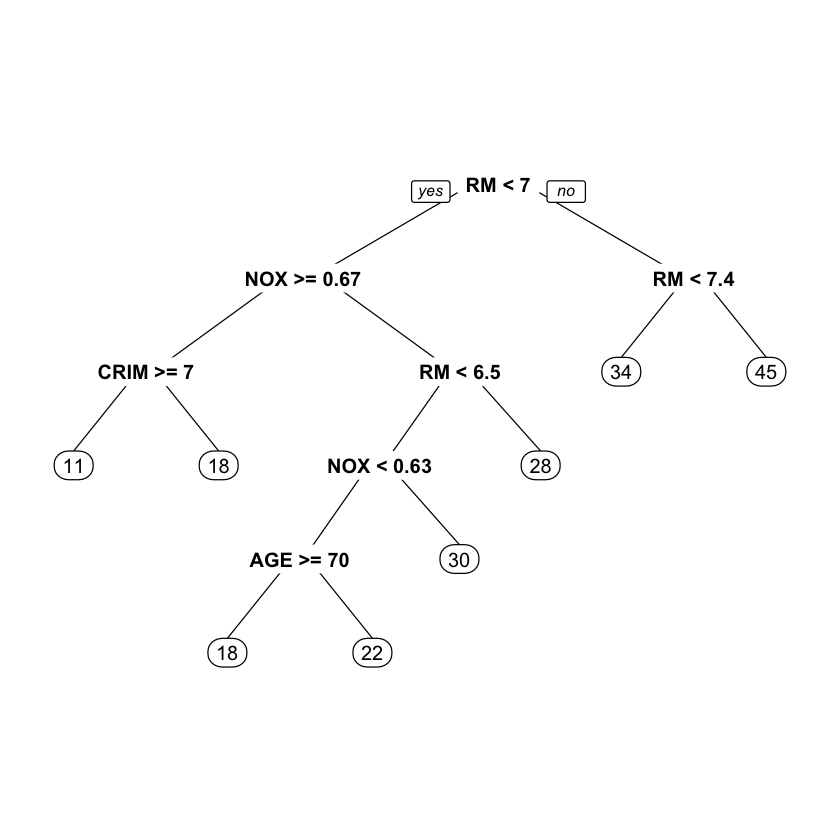

In [48]:
prp(tree)

In [49]:
tree.pred = predict(tree, newdata = test)
tree.sse = sum((tree.pred - test$MEDV)^2)
tree.sse

[1] 4328.988

## Not so good, how do we improve it?

## "cp" parameter

* complexity parameter
* lambda - split number regulation
* cost = RSS + lambda*number_split
* cp = lambda/(RSS)
* small number of cp encourage large trees
* large number of cp encourage small trees (like regulation term)

In [51]:
library(caret)
library(e1071)

In [52]:
tr.control = trainControl(method='cv', number=10)

In [53]:
cp.grid = expand.grid(.cp = (0:10)*0.001)

In [54]:
tr = train(MEDV ~ LAT + LON + CRIM + ZN + INDUS + CHAS + NOX
            + RM + AGE + DIS + RAD + TAX + PTRATIO,
            data=train,
          method='rpart',
          trControl = tr.control,
          tuneGrid = cp.grid)

In [55]:
tr

CART 

364 samples
 15 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 328, 327, 329, 328, 327, 328, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared 
  0.000  4.795661  0.7251433
  0.001  4.808653  0.7241589
  0.002  4.843092  0.7203932
  0.003  4.855853  0.7187000
  0.004  4.992709  0.7032541
  0.005  4.984651  0.7008777
  0.006  5.018776  0.6955937
  0.007  4.994024  0.6980549
  0.008  5.017056  0.6951007
  0.009  4.989958  0.6965547
  0.010  4.989958  0.6965547

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0. 

In [56]:
best.tree = tr$finalModel

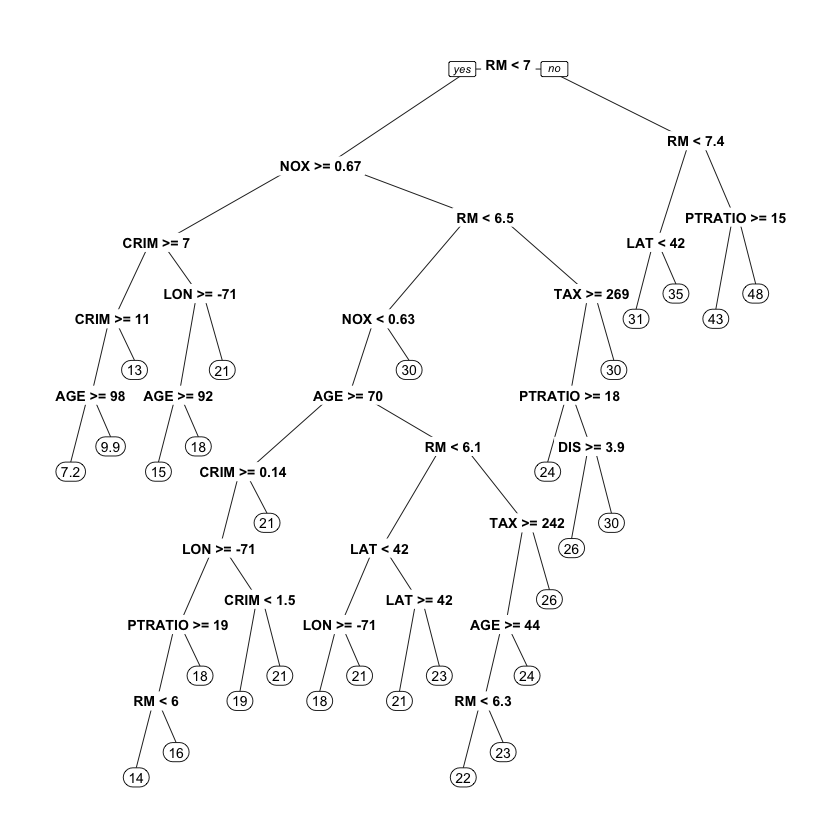

In [57]:
prp(best.tree)

In [58]:
best.tree.pred = predict(best.tree, newdata = test)
best.tree.sse = sum((best.tree.pred - test$MEDV)^2)
best.tree.sse

[1] 3660.149

In [59]:
linreg.sse

[1] 3037.088

## Takeaway is:

** Trees are not always the best model! **